# STAT 301 Project Proposal: Quantifying Student Performance #

#### Group 24: Selena Shew, Jasmeher Kathuria, Kratika Rathi, Alex Bastin ####

<img src="https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/blogs/11850/images/kNMw76DRQOG9VtC7yyG3_students-responding-to-task-cards-iin-class.png" alt="Picture of children studying" width=40%>

## 1. Introduction ##

Understanding the factors that determine student performance throughout various stages of education is a worthy yet challenging task. A comprehensive model of student performance would enable educators to help struggling students perform better and continue pursuing education, which has broad societal benefits. 

The primary nature of this project is prediction  as we try to predict whether or not a student fails a class using a subset of variables from the dataset. The dataset selected contains 650 grades achieved in across two Portugese high schools in a Portugese class accompanied by a diverse set of factors that attempt to contextualize a given student's performance. It was collected by Cortez, P., &amp; Silva, A. (2008) by using school reports and questionnaires completed by students. Variables we may consider for this prediction question include degree of internet access, study time, or degree of socialization. An important precursor to this study is the feature selection process which is necessary given an abundance of predictor variables. 

Prior to leveraging feature selection methods, we instead use a literary research-based approach to find variables relevant to a student's performance and decrease the dimensionality of our data. Through reading studies Klein et al., (2022), Moos & Moos (1978), and Pellerin (2005) we compile a list of variables that quantify the factors mentioned in the literature. We offer an overview of these relevant predictor variables and the target below.

| Name | Description | Type |
| --- | --- | --- |
| Romantic | Whether or not a student is involved in a romantic relationship | Categorical (binary) |
| Studytime | Weekly study time | Continuous |
| Goout | Going out with friends | Continuous (scale of 1 to 5) | 
| Internet | Whether or not the student has access to the internet | Categorical (binary) |
| Absences | Number of school absences | Continuous |
| Failure | Whether or not the student failed the class | Categorical (binary) |

## 2. Data Preparation

### 2.1 Data Wrangling and Balancing

#### 2.1.1 Preliminary Analysis

We start by loading necessary packages

In [56]:
# loading necessary packages
library(broom)
library(tidyverse)
library(tidymodels)
library(GGally)
library(ggplot2)
require(gridExtra)
# install.packages( c("xts","quantmod"))
# install.packages("DMwR_0.4.1.tar.gz")
# library(DMwR)
library(readxl)
library(tidyverse)
library(repr)
library(caret)
library(forcats)
set.seed(1234)

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




In [117]:
library(leaps)
library(boot)
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Here we read our data from the online source of the UCI Machine Learning repository. This ensures our project is easily reproducible as the data does not have to be included.

In [4]:
temp <- tempfile(fileext = ".zip")
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip",
  temp)
out <- unzip(temp, exdir = tempdir())
data <- read.csv(out[2], sep = ";") # out[2] represents the portugese grades
head(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


Now we check for any missing values

In [5]:
apply(data, 2, function(x) any(is.na(x)))

school        sex        age    address    famsize    Pstatus       Medu 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  failures  schoolsup     famsup       paid activities    nursery     higher 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
    health   absences         G1         G2         G3 
     FALSE      FALSE      FALSE      FALSE      FALSE

Since all the results are FALSE in the above code snippet, this confirms we don't have any missing or "NA" values in our dataset

In [6]:
colnames(data) #checking the column names within the data

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

Using the findings of the aformentioned research papers, we select the relevant variables for our preliminary analysis.

In [7]:
data_prelim <- data %>%
    select(failures, romantic, studytime, goout, internet, absences)

In [8]:
head(data_prelim)

,failures,romantic,studytime,goout,internet,absences
,<int>,<chr>,<int>,<int>,<chr>,<int>
1,0,no,2,4,no,4
2,0,no,2,3,yes,2
3,0,no,2,2,yes,6
4,0,yes,3,2,yes,0
5,0,no,2,2,no,0
6,0,no,2,2,yes,6


Here we use ggpairs() to visualize the relationships in the data

In [9]:
options(repr.plot.width = 10, repr.plot.height = 7)

# COMMENTED OUT TO RUN PROGRAM FASTER

# student_perform_pairplots <- data_prelim %>%
#   ggpairs(progress = FALSE) +
#   theme(
#     text = element_text(size = 15),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold")
#   )
# student_perform_pairplots

Now we are visualizing the number of class failures depending on whether the student is in a relationship or not

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



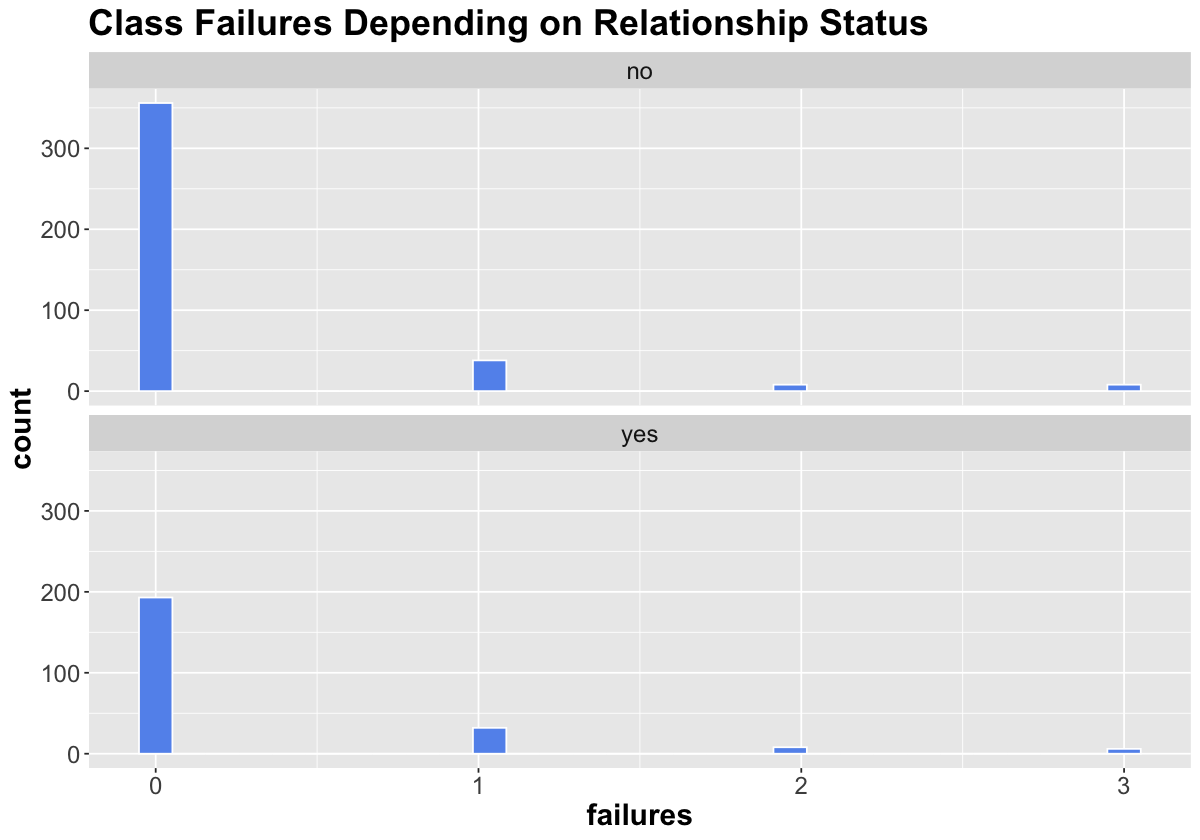

In [10]:
fail_rom_plot <- data_prelim %>%
  ggplot(aes(x = failures)) +
  geom_histogram(fill = "cornflowerblue",
                 color = "white") +
  facet_wrap(~romantic, ncol = 1) +
  labs(title = "Class Failures Depending on Relationship Status") +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

fail_rom_plot

As future analyses will require numerical inputs, we will convert all binary variables represented as strings to an integer as either 0 or 1. Variables we convert to binary include school, sex, address, famsize, pstatus, Medu, Fedu, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic. All other identification and non-binary string variables will be removed  

In [11]:
# Removing irrelevant variables
data <- data %>%
    select(-c(Mjob, Fjob, reason, G1, G2, G3))

# Reassigning values from <chr> to <int> equivalents
data <- data %>%
    mutate(school = as.integer(if_else(school == "GP", 0,1))) %>%
    mutate(sex = as.integer(if_else(sex == "M", 0,1))) %>%
    mutate(address = as.integer(if_else(address == "U", 0,1))) %>%
    mutate(famsize = as.integer(if_else(famsize == "LE3", 0,1))) %>%
    mutate(Pstatus = as.integer(if_else(Pstatus == "T", 0,1))) %>%
    mutate(guardian = as.integer(if_else(guardian == "father", 0, 
                                 if_else(guardian == "mother", 1, 2)))) %>%
    mutate(schoolsup = as.integer(if_else(schoolsup == "no", 0,1))) %>%
    mutate(famsup = as.integer(if_else(famsup == "no", 0,1))) %>%
    mutate(paid = as.integer(if_else(paid == "no", 0,1))) %>%
    mutate(activities = as.integer(if_else(activities == "no", 0,1))) %>%
    mutate(nursery = as.integer(if_else(nursery == "no", 0,1))) %>%
    mutate(higher = as.integer(if_else(higher == "no", 0,1))) %>%
    mutate(internet = as.integer(if_else(internet == "no", 0,1))) %>%
    mutate(romantic = as.integer(if_else(romantic == "no", 0,1)))
data

# School: GP = 0, MS = 1
# Sex: M = 0, F = 1
# Address: U = 0, R = 1
# Famsize: LE3 = 0, GT3 = 1
# Pstatus: T = 0, A = 1 
# guardian: "father" = 0, "mother" = 1, "other" = 2
# schoolsup: no = 0, yes = 1
# famsup: no = 0, yes = 1
# paid: no = 0, yes = 1
# activities: no = 0, yes = 1
# nursery: no = 0, yes = 1
# higher: no = 0, yes = 1
# internet: no = 0, yes = 1
# romantic: no = 0, yes = 1

school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,⋯,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,18,0,1,1,4,4,1,2,⋯,1,0,0,4,3,4,1,1,3,4
0,1,17,0,1,0,1,1,0,1,⋯,1,1,0,5,3,3,1,1,3,2
0,1,15,0,0,0,1,1,1,1,⋯,1,1,0,4,3,2,2,3,3,6
0,1,15,0,1,0,4,2,1,1,⋯,1,1,1,3,2,2,1,1,5,0
0,1,16,0,1,0,3,3,0,1,⋯,1,0,0,4,3,2,1,2,5,0
0,0,16,0,0,0,4,3,1,1,⋯,1,1,0,5,4,2,1,2,5,6
0,0,16,0,0,0,2,2,1,1,⋯,1,1,0,4,4,4,1,1,3,0
0,1,17,0,1,1,4,4,1,2,⋯,1,0,0,4,1,4,1,1,1,2
0,0,15,0,0,1,3,2,1,1,⋯,1,1,0,4,2,2,1,1,1,0


#### 2.1.2 Class Analysis

Now we visualize the distribution of our target variable, the number of failed classes per student. This will be useful to detect potential class imbalances and see if changes will be necessary.

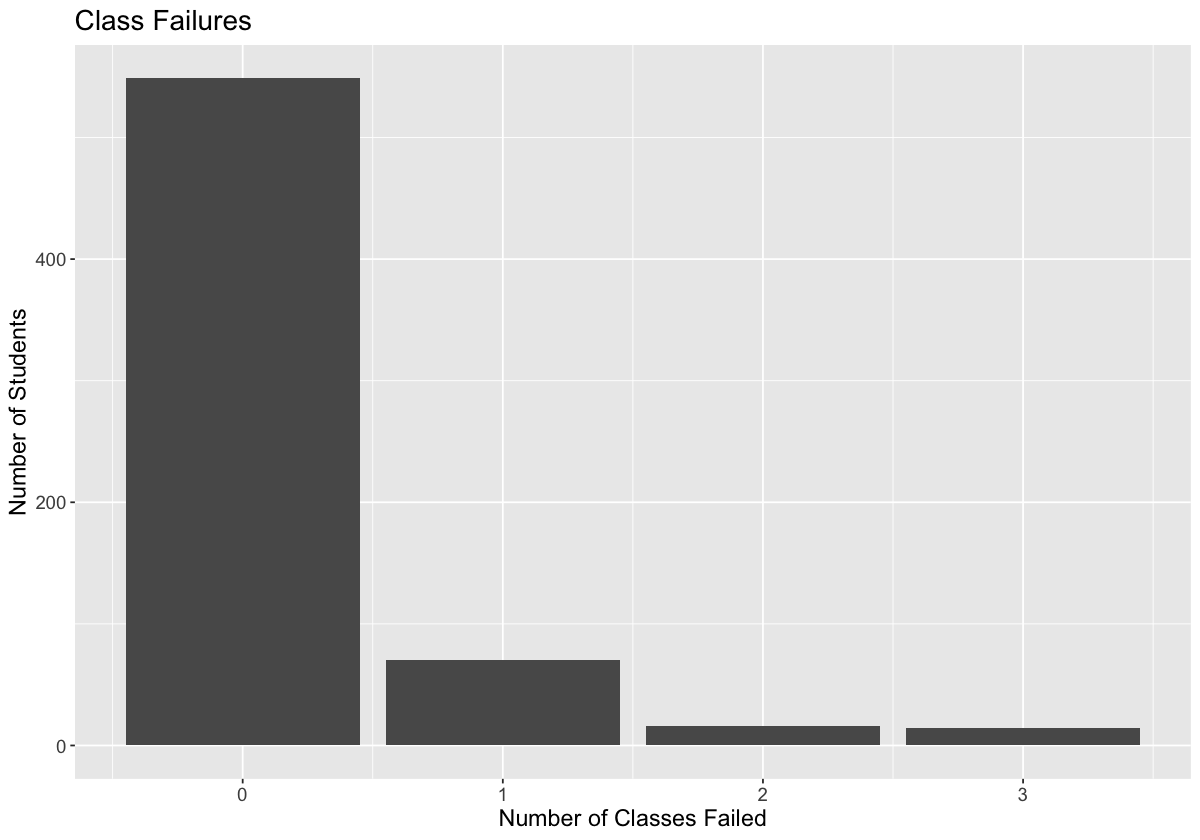

In [12]:
fail_plot <- data %>%
  ggplot(aes(x = failures)) +
  geom_bar() +
  theme(
    text = element_text(size = 14)
  ) +
  ggtitle("Class Failures") +
  xlab("Number of Classes Failed") +
  ylab("Number of Students")

fail_plot 

Evidently, there is a large class imbalance. As supported by academics, INSERT (YEAR) and INSERT (YEAR), class imbalances can harm the accuracy of models and should be adjusted. We will correspondingly create a binary variable to try to remedy this issue. This binary variable of failures, binary.failures, is a binary variable that is 0 if a student had no failures and 1 otherwise.

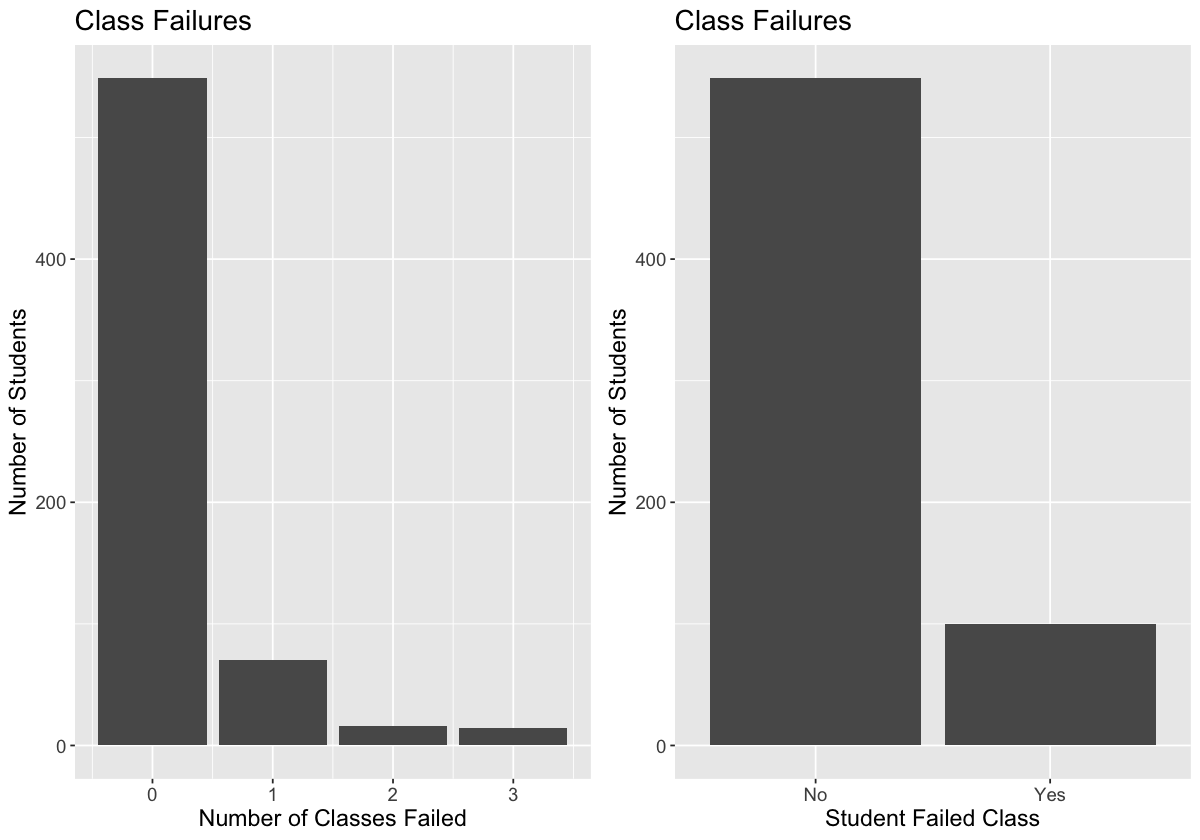

In [13]:
options(repr.matrix.max.cols=33, repr.matrix.max.rows=10)

data <- data %>%
    mutate(binary.failures = as_factor(if_else(failures < 1, 0,1)))

fail_plot_binary <- data %>%
    ggplot(aes(x = binary.failures)) +
    geom_bar() +
    theme(text = element_text(size = 14)) +
    ggtitle("Class Failures") +
    xlab("Student Failed Class") +
    ylab("Number of Students") +
    scale_x_discrete(labels=c("No", "Yes"))

grid.arrange(fail_plot, fail_plot_binary, ncol=2)

In [20]:
binary.fail <- sum(data$binary.failures == 0)
binary.fail <- sum(data$binary.failures == 1)
paste("Student with no failures: ", binary.pass)
paste("Student with failures: ", binary.fail)

ERROR: Error in paste("Student with no failures: ", binary.pass): object 'binary.pass' not found


#### 2.1.3 SMOTE Balancing

Despite the creation of binary.failures, there still exists a significant class imbalance. As the minority class is too small to downsample the majority class to, we will use the SMOTE method to reduce the inequality. We begin by splitting the dataset into a training and testing set at a 75-25% split.

In [21]:
set.seed(1234)
data_split <- initial_split(data, prop = 0.75, strata = binary.failures)
data_train <- training(data_split)
data_test <- testing(data_split)

Now, we visualize the training and testing datasets to display that the class imbalance was maintained.

[1] "Student with no failures:  411"

[1] "Student with failures:  75"

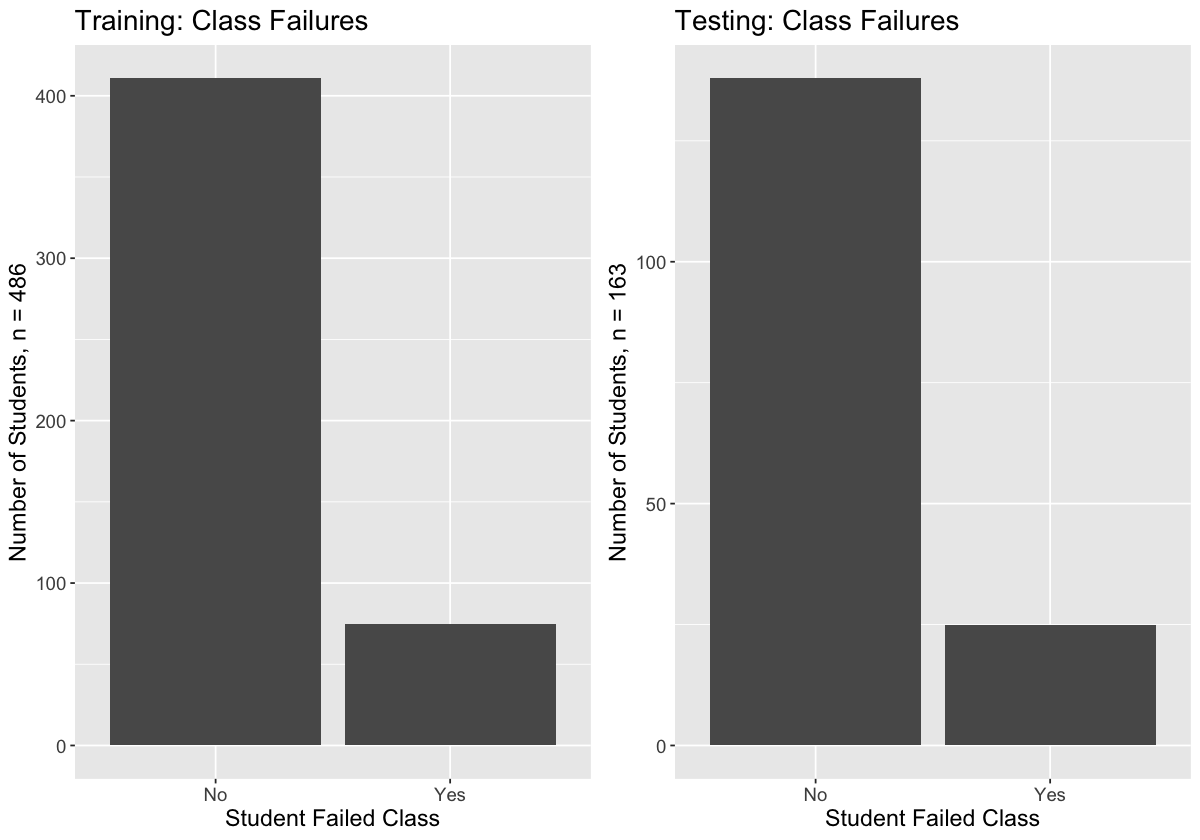

In [22]:
train_fail_plot <- data_train %>%
    ggplot(aes(x = binary.failures)) +
    geom_bar() +
    theme(text = element_text(size = 14)) +
    ggtitle("Training: Class Failures") +
    xlab("Student Failed Class") +
    ylab(paste("Number of Students, n =",nrow(data_train))) +
    scale_x_discrete(labels=c("No", "Yes"))

test_fail_plot <- data_test %>%
    ggplot(aes(x = binary.failures)) +
    geom_bar() +
    theme(text = element_text(size = 14)) +
    ggtitle("Testing: Class Failures") +
    xlab("Student Failed Class") +
    ylab(paste("Number of Students, n =",nrow(data_test))) +
    scale_x_discrete(labels=c("No", "Yes"))

grid.arrange(train_fail_plot, test_fail_plot, ncol=2)

paste("Student with no failures: ", sum(data_train$binary.failures == 0))
paste("Student with failures: ", sum(data_train$binary.failures == 1))

Using the SMOTE package, we generate samples to increase both the minority and majority classes to an equilibrium at 825 observations per class for a total of 1650.

In [23]:
# data_train_balanced <- SMOTE(binary.failures ~ ., data_train, perc.over = 1000, perc.under = 110)

# paste("Student with no failures: ", sum(data_train_balanced$binary.failures == 0))
# paste("Student with failures: ", sum(data_train_balanced$binary.failures == 1))

# data_train_balanced

Unfortunately, the SMOTE package availabe in R works only for continuous data despite ours being discrete. To ensure our data remains discrete, we round the entire dataset excluding binary.failures. 

In [24]:
# # now we abbreviate data_train_balanced to dtb
# dtb_round_all <- data_train_balanced %>%
#     select(-binary.failures) %>%
#     round(0)

# dtb_binary.failures = data_train_balanced %>% select(binary.failures)

# dtb = cbind(dtb_round_all, dtb_binary.failures)
# dtb

Below we compare the now-balanced training set to the testing set to demonstrate the preservation of the testing set.

In [25]:
# train_adjusted <- dtb %>%
#     ggplot(aes(x = binary.failures)) +
#     geom_bar() +
#     theme(text = element_text(size = 14)) +
#     ggtitle("Training: Class Failures") +
#     xlab("Student Failed Class") +
#     ylab(paste("Number of Students, n =",nrow(dtb))) +
#     scale_x_discrete(labels=c("No", "Yes"))

# test_adjusted <- data_test %>%
#     ggplot(aes(x = binary.failures)) +
#     geom_bar() +
#     theme(text = element_text(size = 14)) +
#     ggtitle("Testing: Class Failures") +
#     xlab("Student Failed Class") +
#     ylab(paste("Number of Students, n =",nrow(data_test))) +
#     scale_x_discrete(labels=c("No", "Yes"))

# grid.arrange(train_adjusted, test_adjusted, ncol=2)

### 2.2 Feature Selection

#### 2.2.1 Forward Selection

In [26]:
data_train <-
    data_train %>%
    select(-failures)

head(data_train)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,binary.failures
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,1,18,0,1,1,4,4,1,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0
3,0,1,15,0,0,0,1,1,1,1,2,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,0
5,0,1,16,0,1,0,3,3,0,1,2,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,0
6,0,0,16,0,0,0,4,3,1,1,2,0,1,0,1,1,1,1,0,5,4,2,1,2,5,6,0
7,0,0,16,0,0,0,2,2,1,1,2,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,0
8,0,1,17,0,1,1,4,4,1,2,2,1,1,0,0,1,1,0,0,4,1,4,1,1,1,2,0


In [27]:
student_variable_select <- regsubsets(
  x = binary.failures ~ ., nvmax = 26, #nvmax = the max number of variables
  data = data_train,
  method = "forward", #select forward method
)


In [28]:
student_variable_select_summary <- summary(student_variable_select)
student_variable_select_summary

Subset selection object
Call: regsubsets.formula(x = binary.failures ~ ., nvmax = 26, data = data_train, 
    method = "forward", )
26 Variables  (and intercept)
           Forced in Forced out
school         FALSE      FALSE
sex            FALSE      FALSE
age            FALSE      FALSE
address        FALSE      FALSE
famsize        FALSE      FALSE
Pstatus        FALSE      FALSE
Medu           FALSE      FALSE
Fedu           FALSE      FALSE
guardian       FALSE      FALSE
traveltime     FALSE      FALSE
studytime      FALSE      FALSE
schoolsup      FALSE      FALSE
famsup         FALSE      FALSE
paid           FALSE      FALSE
activities     FALSE      FALSE
nursery        FALSE      FALSE
higher         FALSE      FALSE
internet       FALSE      FALSE
romantic       FALSE      FALSE
famrel         FALSE      FALSE
freetime       FALSE      FALSE
goout          FALSE      FALSE
Dalc           FALSE      FALSE
Walc           FALSE      FALSE
health         FALSE      FALSE
absenc

In [29]:
student_select_summary_df <- tibble(
    n_input_variables = 1:26,
    Cp = student_variable_select_summary$cp,
    adj.r2 = student_variable_select_summary$adjr2#this is the metric we’ll look at to decide
)

In [30]:
print(tbl_df(student_select_summary_df), n=26)

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.”


# A tibble: 26 × 3
   n_input_variables    Cp adj.r2
               <int> <dbl>  <dbl>
 1                 1 57.9  0.0893
 2                 2 28.8  0.140 
 3                 3 20.7  0.155 
 4                 4 15.1  0.166 
 5                 5 10.3  0.176 
 6                 6  7.76 0.182 
 7                 7  5.88 0.187 
 8                 8  5.43 0.190 
 9                 9  5.34 0.192 
10                10  4.24 0.195 
11                11  4.47 0.197 
12                12  4.62 0.198 
13                13  5.22 0.199 
14                14  5.42 0.200 
15                15  6.92 0.199 
16                16  8.45 0.198 
17                17 10.1  0.197 
18                18 11.8  0.196 
19                19 13.5  0.195 
20                20 15.4  0.193 
21                21 17.2  0.192 
22                22 19.1  0.190 
23                23 21.0  0.189 
24                24 23.0  0.187 
25                25 25.0  0.185 
26                26 27    0.184 


**From the code above we know that the best model from forward selection contains 13 variables. These 13 variables are school, age, famsize, Medu, guardian, studytime, paid, higher, famrel, freetime, goout, Dalc, absences.**

In [31]:
selected_variables <- as.formula("binary.failures ~ school + age + famsize + Medu + guardian + studytime + paid + higher + famrel + freetime + goout + Dalc + absences")
selected_variables

binary.failures ~ school + age + famsize + Medu + guardian + 
    studytime + paid + higher + famrel + freetime + goout + Dalc + 
    absences

## 3. Methods

### 3.1. Inference

As part of our project, we would also like to investigate the relationship between the chosen explanatory variables and the binary response variable. In other words, we want to know whether the explanatory variables are statistically associated with the probability of the response (the odds of a student having failed at least one class and the odds of a student never having failed a class).

We begin by fitting a binary logistic regression model using the chosen variables from the variable selection process above:

In [32]:
student_binary_model <- 
  glm(
       formula = selected_variables,
       data = data_train,
       family = binomial)

summary(student_binary_model)


Call:
glm(formula = selected_variables, family = binomial, data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0370  -0.5154  -0.3344  -0.1673   2.7681  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.162616   2.431466  -4.180 2.92e-05 ***
school        0.486314   0.313139   1.553  0.12042    
age           0.671483   0.138532   4.847 1.25e-06 ***
famsize       0.157186   0.331039   0.475  0.63491    
Medu         -0.447887   0.146135  -3.065  0.00218 ** 
guardian     -0.079839   0.298949  -0.267  0.78942    
studytime    -0.422730   0.205297  -2.059  0.03948 *  
paid          1.618641   0.506994   3.193  0.00141 ** 
higher       -1.097618   0.401443  -2.734  0.00625 ** 
famrel       -0.343796   0.145605  -2.361  0.01822 *  
freetime      0.290394   0.152564   1.903  0.05698 .  
goout        -0.177440   0.131667  -1.348  0.17777    
Dalc          0.005757   0.154093   0.037  0.97020    
absences      0.068280

Next, we obtain the estimated coefficients, standard errors, p-values, and confidence intervals:

In [33]:
student_binary_model_results <- 
  tidy(student_binary_model, conf.int = TRUE) 

student_binary_model_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-10.1626163,2.4314660,-4.1796250,2.919902e-05,-15.0885961,-5.5200251
school,0.4863137,0.3131395,1.5530258,1.204170e-01,-0.1290787,1.1029284
age,0.6714832,0.1385325,4.8471172,1.252684e-06,0.4076556,0.9529328
famsize,0.1571864,0.3310388,0.4748276,6.349098e-01,-0.4788541,0.8254875
Medu,-0.4478871,0.1461348,-3.0648909,2.177494e-03,-0.7428299,-0.1678602
⋮,⋮,⋮,⋮,⋮,⋮,⋮
famrel,-0.34379581,0.14560467,-2.36115919,0.01821791,-0.629515333,-0.05647142
freetime,0.29039426,0.15256386,1.90342757,0.05698478,-0.005875087,0.59416160
goout,-0.17743974,0.13166658,-1.34764444,0.17777277,-0.437864604,0.07990899


Afterwards, we add the estimated effect each of the variables has on the odds of having failed or never failing a class to student_binary_model_results. We also examine the confidence intervals of these effects:

In [34]:
student_binary_model_results <- 
  student_binary_model_results %>%
  mutate(
    exp.estimate = exp(estimate),
    exp.conf.low = exp(conf.low),
    exp.conf.high = exp(conf.high)) %>%
  mutate_if(is.numeric, round, 6)


In [35]:
print(tbl_df(student_binary_model_results ), n=14)

# A tibble: 14 × 10
   term        estimate std.e…¹ stati…² p.value conf.low conf.…³ exp.e…⁴ exp.c…⁵
   <chr>          <dbl>   <dbl>   <dbl>   <dbl>    <dbl>   <dbl>   <dbl>   <dbl>
 1 (Intercept) -1.02e+1  2.43   -4.18   2.9 e-5 -1.51e+1 -5.52   3.9 e-5   0    
 2 school       4.86e-1  0.313   1.55   1.20e-1 -1.29e-1  1.10   1.63e+0   0.879
 3 age          6.71e-1  0.139   4.85   1   e-6  4.08e-1  0.953  1.96e+0   1.50 
 4 famsize      1.57e-1  0.331   0.475  6.35e-1 -4.79e-1  0.825  1.17e+0   0.619
 5 Medu        -4.48e-1  0.146  -3.06   2.18e-3 -7.43e-1 -0.168  6.39e-1   0.476
 6 guardian    -7.98e-2  0.299  -0.267  7.89e-1 -6.63e-1  0.513  9.23e-1   0.515
 7 studytime   -4.23e-1  0.205  -2.06   3.95e-2 -8.40e-1 -0.0331 6.55e-1   0.432
 8 paid         1.62e+0  0.507   3.19   1.41e-3  6.01e-1  2.61   5.05e+0   1.82 
 9 higher      -1.10e+0  0.401  -2.73   6.25e-3 -1.88e+0 -0.302  3.34e-1   0.152
10 famrel      -3.44e-1  0.146  -2.36   1.82e-2 -6.30e-1 -0.0565 7.09e-1   0.533
11 freet

Using a significance value of 0.05, we can see that the variables that are statistically associated with the response, binary.failures, are 'age' (the age of the student), 'Medu' (the mother's education level), 'studytime', 'paid' (paying for extra classes within the course subject), 'higher' (wants to take higher education), 'famrel' (quality of family relations) and 'absences.'

### 3.2. Binary Classification

In our project we would like to evaluate the classification based off of two models, one that we have learnt in the past, that is KNN classification which uses nearest data points to classify new data introduced; and one which we were introduced in this course of logistic regression which we will be using for prediction

#### 3.2.1. kNN Classification

In [43]:
# Training data after SMOTE balancing for kNN classification 
head(data_train)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,binary.failures
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,1,18,0,1,1,4,4,1,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0
3,0,1,15,0,0,0,1,1,1,1,2,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,0
5,0,1,16,0,1,0,3,3,0,1,2,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,0
6,0,0,16,0,0,0,4,3,1,1,2,0,1,0,1,1,1,1,0,5,4,2,1,2,5,6,0
7,0,0,16,0,0,0,2,2,1,1,2,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,0
8,0,1,17,0,1,1,4,4,1,2,2,1,1,0,0,1,1,0,0,4,1,4,1,1,1,2,0


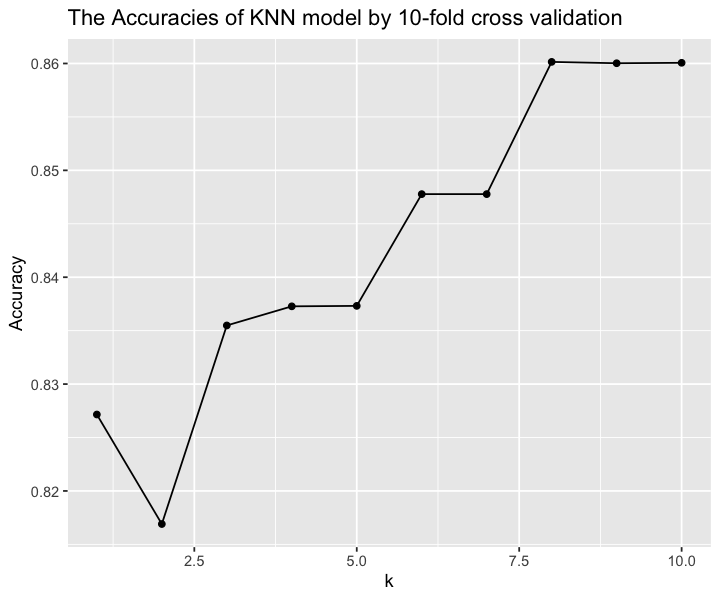

In [66]:
data_train_knn <- data_train %>% select(school , age , famsize , Medu ,
                                        guardian , studytime , paid , higher ,
                                        famrel , freetime , goout , Dalc , absences, binary.failures)
data_test_knn <- data_test %>% select(school , age , famsize , Medu ,
                                        guardian , studytime , paid , higher ,
                                        famrel , freetime , goout , Dalc , absences, binary.failures)

scale_transformer <- preProcess(data_train_knn, method = c("center", "scale")) 
training_set <- predict(scale_transformer, data_train_knn)
testing_set <- predict(scale_transformer, data_test_knn)

X_train <- training_set %>% 
  select(-binary.failures) %>% 
  data.frame()
Y_train <- training_set %>% 
  select(binary.failures) %>% 
  unlist()
X_test <- testing_set %>%
  select(-binary.failures) %>%
  data.frame()
Y_test <- testing_set %>%
  select(binary.failures) %>%
  unlist()

train_control <- trainControl(method = "cv", number = 10)
k_lots = data.frame(k = seq(from = 1, to = 10, by = 1))
knn_model_cv_10fold <- train(x = X_train,
                       y = Y_train,
                       method = "knn",
                       tuneGrid = k_lots,
                       trControl = train_control)

# visualizing results
knn_model_cv_10fold_plot <- ggplot(knn_model_cv_10fold$results, aes(x = k, y = Accuracy)) +
                            geom_point() +
                            geom_line() +
                            ggtitle("The Accuracies of KNN model by 10-fold cross validation")
options(repr.plot.width = 6, repr.plot.height = 5)
knn_model_cv_10fold_plot

From the above plot we will choose an optimal k of 8 since the accuracy does not increase significantly after that. Moreover, a k value higher than this might cause overfitting.

In [123]:
# choose the optimal k
k = data.frame(k = 8)

# train knn clssifier
knn_model_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

# predict on test_set 
test_pred <- predict(knn_model_10fold, X_test) %>% unlist()
test_results <- confusionMatrix(table(test_pred, Y_test))

# report the accuracy of this prediction
test_results

Confusion Matrix and Statistics

         Y_test
test_pred   0   1
        0 133  17
        1   5   8
                                          
               Accuracy : 0.865           
                 95% CI : (0.8028, 0.9134)
    No Information Rate : 0.8466          
    P-Value [Acc > NIR] : 0.29970         
                                          
                  Kappa : 0.3532          
                                          
 Mcnemar's Test P-Value : 0.01902         
                                          
            Sensitivity : 0.9638          
            Specificity : 0.3200          
         Pos Pred Value : 0.8867          
         Neg Pred Value : 0.6154          
             Prevalence : 0.8466          
         Detection Rate : 0.8160          
   Detection Prevalence : 0.9202          
      Balanced Accuracy : 0.6419          
                                          
       'Positive' Class : 0               
                                     

#### 3.2.2. Logistic Regression (Prediction)

Using the student binary model from our inference:

In [106]:
misclassification_rate <- function(y, p.hat){
    y_hat <- round(p.hat, 0)
    error_rate <- mean(abs( y - y_hat))
    return(error_rate)
}
target <- training_set %>% 
  select(binary.failures) %>%
data.frame()
numeric_target <- as.numeric(target$binary.failures)
error_rate_train <- 
    misclassification_rate(
        numeric_target, 
        student_binary_model$fitted.values)

error_rate_train

[1] 1.08642

In [108]:
# In order to use full training 

cv_logistic <- 
    cv.glm(
        glmfit = student_binary_model, 
        data = data.frame(training_set) , 
        K = 10, 
        cost = misclassification_rate)
cv_logistic$delta[1]

[1] 0.1460905

Since our data was split into 0.75-0.25 split, we will need to create a confusion matrix with a p_0 value of 0.25.

In [115]:
p_0 <- 0.25

student_pred_class_threshold_0.25 <- 
  ifelse(predict(student_binary_model,data.frame(training_set),type = "response")>p_0, 1, 0)

student_confusion_matrix_0.25 <- 
    confusionMatrix(
    data = as.factor(student_pred_class_threshold_0.25),
    reference = as.factor(data.frame(training_set)$binary.failures),
    positive = "1"
)
student_confusion_matrix_0.25

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 411  74
         1   0   1
                                          
               Accuracy : 0.8477          
                 95% CI : (0.8127, 0.8785)
    No Information Rate : 0.8457          
    P-Value [Acc > NIR] : 0.4807          
                                          
                  Kappa : 0.0223          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.013333        
            Specificity : 1.000000        
         Pos Pred Value : 1.000000        
         Neg Pred Value : 0.847423        
             Prevalence : 0.154321        
         Detection Rate : 0.002058        
   Detection Prevalence : 0.002058        
      Balanced Accuracy : 0.506667        
                                          
       'Positive' Class : 1               
                              

Now we will make the ROC curve below:

Setting levels: control = 1, case = 2

Setting direction: controls < cases



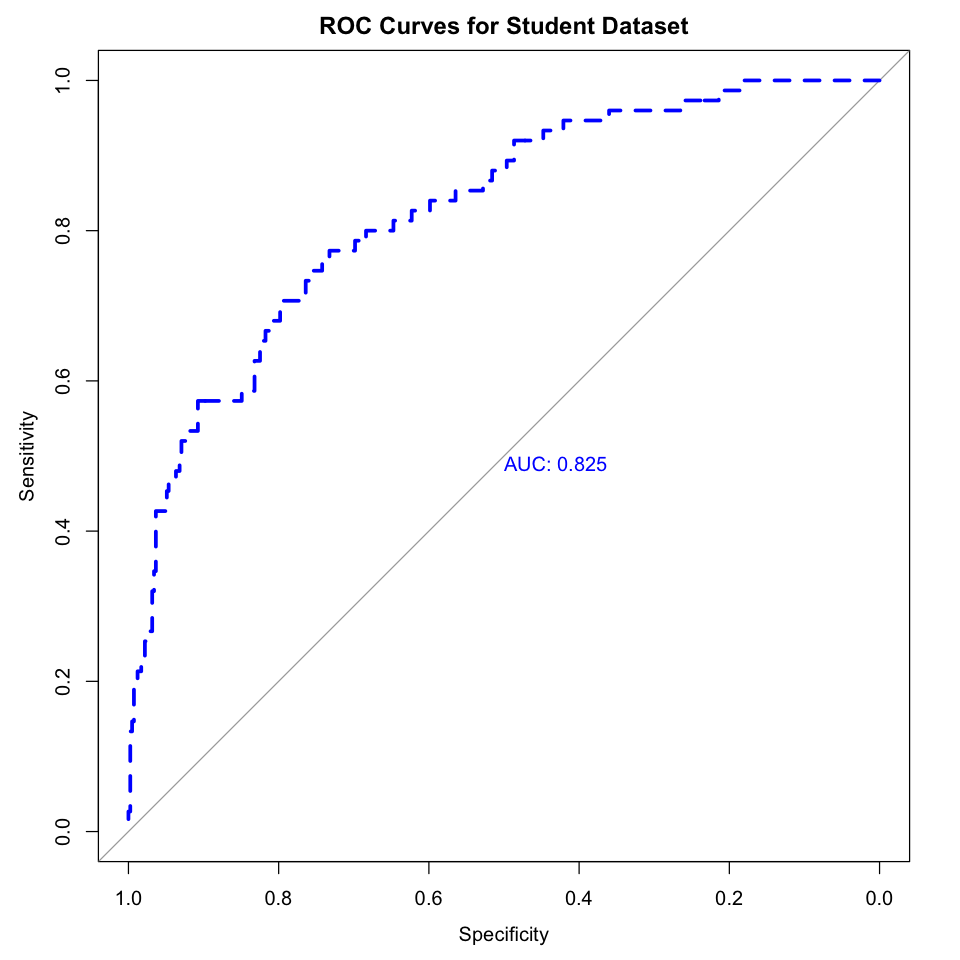

In [118]:
options(repr.plot.width = 8, repr.plot.height = 8)
ROC_full_log <- roc(
  response = numeric_target,
  predictor = student_binary_model$fitted.values
)
plot(ROC_full_log,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Student Dataset"
)

## 4. Results ##

The final report will be trustworthy as we diligently and truthfully apply the statistical knowledge and techniques taught in DSCI 100, STAT 201, and STAT 301. Our research, analysis, and communication for this project are and continue to be extensive and thoughtful. The sources that we have used to support our research are peer-reviewed and offer a strong understanding behind the factors affecting student performance.

Before we begin any sort of model generation or selection, we need to make sure that the data we're working on is clean. Prior to continuing, we will confirm an absence of multimulticollinearity using a correlation matrix. With a new subset of data that includes the relevant features and the target variable, we will convert the failures variable into a binary variable with a 0 for no failures and a 1 for having one or greater failures. This will yield a minor class imbalance that we will alleviate by upsampling the minority class (students that failed) as the majority class (students that did not fail) outnumber it greatly. We will then split the data into training and testing sets, then fit an a linear model and a kNN model on the training sets.

To accomplish our objective of predicting whether or not a student fails, we begin by implementing stepwise feature selection methods using the regsubsets() and a filter feature selection method using summary() on the now-cleaned data. The consensus of these methods will determine the quantity and choice of variables used. In this project, we apply forward selection to select the best set of variables for our model. Since we are unsure about the number of variables that should be in our model, we ran regsubsets() with nvmax equal to the number of variables present in our data. We then compared the adjusted R^2 value and Cp of all the models (of different sizes) and selected the model with 13 variables as the best fit. The variables selected by forward selection are 'school', 'age', 'famsize', 'Medu', 'guardian', 'studytime', 'paid', 'higher', 'famrel', 'freetime', 'goout', 'Dalc', and 'absences'. 

Now that we are equipped with the best variables, we can start with logistic regression using the glm() function. From the inference section, we can see that the summary() of the model shows us that only 7 of the 13 variables are significant (ie with a p-value of less than 0.05) and are correlated with the response. These variables are 'age' (the age of the student), 'Medu' (the mother's education level), 'studytime', 'paid' (paying for extra classes within the course subject), 'higher' (wants to take higher education), 'famrel' (quality of family relations) and 'absences'.

While we understand that in real world applications we would have to lock in a model, for the purposes of our student project, we also wondered if fitting another model would give us better results. We decided to apply the KNN Nearest Neighbour Model (learnt in previous courses) to our data. For hyper-parameter optimization, we plotted the 'elbow' plot to select the best value for K (number of neighbours). We decided that K should be 8. Using both models (KNN and Logistic Regression) we will make predictions on the testing set and use various error metrics to quantify the performance of these models. For each model we will calculate the statistical significance to determine their real-world applicability.

We decided that we would compare the models based on Accuracy. We report an accuracy of 0.865 for KNN and 0.847 for Logistic Regression. Thus, KNN is slightly better than logistic regression.

To summarize, the Logistic regression model that we fit had 13 variables (inputs) and we saw that 7 of them are statistically significant (ie a p-value of less than 0.05). Based on our model, variables such as 'Medu' (the mother's education level), 'studytime', 'guardian' (student's guardian), 'higher' (wants to take higher education), 'famrel' (quality of family relations), and 'goout' (going out with friends) have negative coefficients which means that they lead to 0 (no failure). Satisfied with our accuracy score of 0.847, we conclude that the Logistic regression model that we made is the best model.

## 5. Discussion ##

To summarize, we wanted to achieve a model that will accurately predict if a student has any failures. We hoped that the impact of our results will be that the main variables that affect student performance will be evident and that our model is significant by any metric.

We fit a Logistic Regression model for our data, with the variables given by regsubsets(). We discovered that we had 7 significant variables and that variables such as 'Medu' (the mother's education level), 'studytime', 'guardian' (student's guardian), 'higher' (wants to take higher education), 'famrel' (quality of family relations), and 'goout' (going out with friends) have negative coefficients, which means that they lead to 0 (no class failure). 

The results that we obtained strongly aligned with our expectations of which variables would be significant, as well as their relationship with the response variable (whether a student had failed a class or not). Prior to the start of our project, we had expected that students with high amounts of studying time, aspirations to go on to higher education, and having supportive family units would be highly unlikely to ever fail a class. Thusly, we are greatly satisfied with the results from our model.

As mentioned in the introduction, the significance of this project is concrete. Education is a highly important issue to examine. Many studies such as Shankar et. al (2013) show that education is a key factor in alleviating inequalities. If we are able to raise school graduation rates, this greatly benefits society as community members are able to make better-informed health decisions and increase employoment opportunities, which are also statistically associated with better mental and physical well-being (Shankar et al., 2013).

As seen earlier, some other models such as KNN can also be applied here, which may give us a better accuracy score. These improvements are beyond the scope of this project. 

Future research could be done on collecting more variables and building a better model.

## References ##

Cortez, P., &amp; Silva, A. (2008). Using data mining to predict secondary school student performance. EUROSIS. 

Klein, M., Sosu, E. M., &amp; Dare, S. (2022). School absenteeism and academic achievement: Does the reason for absence matter? AERA Open, 8, 233285842110711. https://doi.org/10.1177/23328584211071115 

Moos, R. H., &amp; Moos, B. S. (1978). Classroom social climate and student absences and grades. Journal of Educational Psychology, 70(2), 263–269. https://doi.org/10.1037/0022-0663.70.2.263 

Pellerin, L. A. (2005). Student disengagement and the socialization styles of high schools. Social Forces, 84(2), 1159–1179. https://doi.org/10.1353/sof.2006.0027 

Shankar, J., Ip, E., Khalema, E., Couture, J., Tan, S., Zulla, R. T., & Lam, G. (2013). Education as a social determinant of health: issues facing indigenous and visible minority students in postsecondary education in Western Canada. International journal of environmental research and public health, 10(9), 3908–3929. https://doi.org/10.3390/ijerph10093908